In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
train_set = torchvision.datasets.FashionMNIST("./data",download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)


In [32]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 6, 5)
        self.fc1 = nn.Linear(6* 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 6 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x
net = ConvNet()
net.to("cuda:0")
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)
for iteration in range(1,101):
    total_loss = 0
    for i,(x,y) in enumerate(train_loader):
        print("{}/{}".format(i+1,len(train_loader)), end="\r")
        predicted = net.forward(x.cuda())
        
        loss = nn.NLLLoss()(predicted,y.cuda())
        optimizer.zero_grad()
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

    print("Iteration: {}  Loss: {}".format(iteration,total_loss/len(train_loader)))


Iteration: 1  Loss: 0.6027030131717523
Iteration: 2  Loss: 0.41978993530074754
Iteration: 3  Loss: 0.3818545002738635
Iteration: 4  Loss: 0.36446237268547216
Iteration: 5  Loss: 0.35491382725536824
Iteration: 6  Loss: 0.35210245569547016
Iteration: 7  Loss: 0.3401891734699408
Iteration: 8  Loss: 0.33373437548677126
Iteration: 9  Loss: 0.33448526432116826
Iteration: 10  Loss: 0.32938059978187084
Iteration: 11  Loss: 0.32468116011470555
Iteration: 12  Loss: 0.3261550693958998
Iteration: 13  Loss: 0.3276595961054166
Iteration: 14  Loss: 0.3234078280131022
Iteration: 15  Loss: 0.3198065551370382
Iteration: 16  Loss: 0.31150938592851163
Iteration: 17  Loss: 0.3156468993301193
Iteration: 18  Loss: 0.3103360339999199
Iteration: 19  Loss: 0.3135800454268853
Iteration: 20  Loss: 0.3082477575043837
Iteration: 21  Loss: 0.311520989947021
Iteration: 22  Loss: 0.3111198193828265
Iteration: 23  Loss: 0.3002489566554626
Iteration: 24  Loss: 0.2982407788187265
Iteration: 25  Loss: 0.2974272314086556
I

<ipython-input-87-9428c4a8b1b0>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction =nn.functional.softmax(net.forward(torch.from_numpy(data[i].reshape(1,1,28,28)).cuda()))


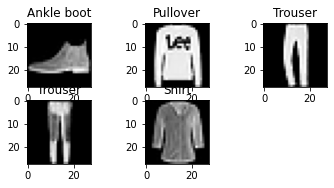

In [87]:
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]
import gzip
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)
for i in range(5):
    plt.subplot(330 + 1 + i)
    prediction =nn.functional.softmax(net.forward(torch.from_numpy(data[i].reshape(1,1,28,28)).cuda()))
    indices = np.argmax(prediction.cpu().detach().numpy())
    plt.title(class_names[indices])
    plt.imshow(data[i].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()
